In [138]:
#All the libraries
from matplotlib import pyplot as plt
import numpy as np
import skimage.color
import skimage.io
import skimage.transform
import requests
import json
import cv2 as cv2
import colorsys
import random

#Getting user uploaded image to display
input_img_file = 'colonic adeno 2.png'
org_img = skimage.io.imread(input_img_file)

# fig = plt.figure()
# fig.set_size_inches(10, 7.5)
# plt.title("The original image")
# plt.imshow(org_img)
# plt.show()


In [139]:
url = 'http://172.17.0.1:5000/model/predict'

# Submit the nuclei detection request by calling the rest API
def get_nuclei(input_img):
    """
    Takes in input image file path and detects poses.
    """
    files = {'image': ('image.jpg',open(input_img,'rb'), 'images/jpeg')}
    result = requests.post(url, files=files).json()
    
    return result



In [140]:
# Start nuclear segmenter on local host, not mitoses detector
# Submit the rest request and print out the JSON result

preds = get_nuclei(input_img_file)
#print(json.dumps(preds, indent=2))


In [141]:
#from core.mask_rcnn.mrcnn.visualize import random_colors, apply_mask

def apply_mask(image, mask, color, alpha=1.0):
    """Apply the given mask to the image.
    """
    for c in range(3):
        image[:, :, c] = np.where(mask == 1,
                                  image[:, :, c] *
                                  (1 - alpha) + alpha * -200,
                                  image[:, :, c])
    return image

def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors

# Decodes the RLE encoded mask to a binary mask  

def rle_decode(rle, shape):
    rle = np.array(rle, dtype=np.int32).reshape([-1, 2])
    rle[:, 1] += rle[:, 0]
    rle -= 1
    mask = np.zeros([shape[0] * shape[1]], np.bool)
    for s, e in rle:
        assert 0 <= s < mask.shape[0]
        assert 1 <= e <= mask.shape[0], "shape: {}  s {}  e {}".format(shape, s, e)
        mask[s:e] = 1
    # Reshape and transpose
    mask = mask.reshape([shape[1], shape[0]]).T
    return mask

def visualize(masks,image):
    figsize=(8, 8) 
    _, ax = plt.subplots(1, figsize=figsize)
        
    colors = random_colors(len(masks))
    
    # Show area outside image boundaries.
    #height, width = image.shape[:2]
    ax.set_ylim(org_img.shape[0])
    ax.set_xlim(org_img.shape[1])
    ax.axis('off')
    #ax.set_title('off')
    
    masked_image = image.astype(np.uint32).copy()
    for i in range(len(masks)):
        mask = masks[i]
        color = colors[i]
        masked_image = apply_mask(masked_image, mask, color)
    ax.imshow(org_img.astype(np.uint8))
    #fig.set_size_inches(org_img.shape[1], org_img.shape[0])
    plt.savefig('masklessmito.png',bbox_inches='tight',pad_inches=0)
    ax.imshow(masked_image.astype(np.uint8))
    #fig.set_size_inches(org_img.shape[1], org_img.shape[0])
    plt.savefig('mito.png',bbox_inches='tight',pad_inches=0)
    plt.show()
    


#draw image and save



/tmp/ipykernel_227/1907052020.py:31: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros([shape[0] * shape[1]], np.bool)


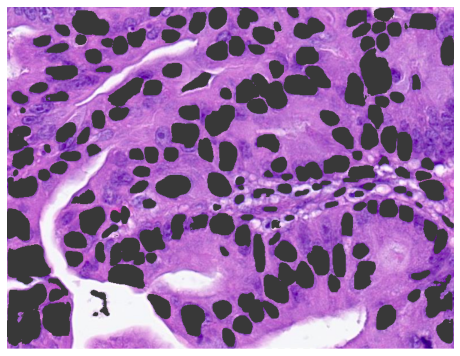

In [142]:
results = preds["predictions"]
masks = []

# Decodes the RLE encoded masks to the binary masks
for result in results:
    mask = result["mask"]
    masks.append(rle_decode(mask, org_img.shape[0:2]))
# Visualize the detected nuclei on the input image    
mask_img=visualize(masks,org_img)


In [143]:
import numpy as np
from PIL import Image

img = np.array(Image.open('mito.png'))
#print(type(img))
# <class 'numpy.ndarray'>
#print(img.shape[0])
#Image.fromarray(np.flipud(img)).save('data/dst/lena_np_flipud.jpg')

Image.fromarray(np.fliplr(img)).save('mitolr.png')

#Image.fromarray(np.flip(img, (0, 1))).save('data/dst/lena_np_flip_ud_lr.jpg')

['x:45 y: 559', 'x:575 y: 551', 'x:13 y: 543', 'x:258 y: 534', 'x:111 y: 519', 'x:431 y: 521', 'x:385 y: 506', 'x:166 y: 526', 'x:521 y: 479', 'x:484 y: 514', 'x:340 y: 519', 'x:588 y: 496', 'x:64 y: 484', 'x:28 y: 499', 'x:10 y: 476', 'x:690 y: 501', 'x:459 y: 454', 'x:496 y: 417', 'x:382 y: 409', 'x:223 y: 424', 'x:719 y: 402', 'x:591 y: 415', 'x:359 y: 399', 'x:149 y: 434', 'x:580 y: 435', 'x:278 y: 444', 'x:323 y: 412', 'x:300 y: 365', 'x:10 y: 363', 'x:273 y: 353', 'x:8 y: 353', 'x:186 y: 415', 'x:410 y: 363', 'x:724 y: 367', 'x:613 y: 368', 'x:561 y: 358', 'x:243 y: 335', 'x:663 y: 429', 'x:49 y: 333', 'x:506 y: 328', 'x:87 y: 362', 'x:355 y: 322', 'x:313 y: 323', 'x:613 y: 322', 'x:134 y: 308', 'x:355 y: 295', 'x:466 y: 300', 'x:390 y: 301', 'x:521 y: 285', 'x:236 y: 286', 'x:114 y: 258', 'x:50 y: 295', 'x:79 y: 255', 'x:617 y: 298', 'x:471 y: 246', 'x:516 y: 246', 'x:679 y: 238', 'x:598 y: 240', 'x:377 y: 250', 'x:308 y: 226', 'x:176 y: 224', 'x:90 y: 218', 'x:647 y: 209', 'x:6

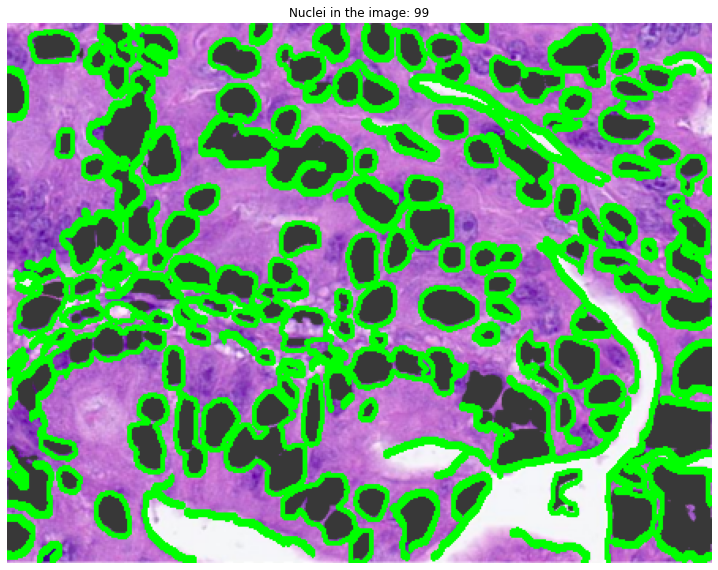

In [144]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
##########################################################################
##########################################################################
##########################################################################
frage = np.array(Image.open(input_img_file))
paramfrage=frage.shape

mrage= np.array(Image.open('mito.png'))
parammrage=mrage.shape
# print(mrage.shape)
xorg2mask=((frage.shape[0])/(mrage.shape[0]))
yorg2mask=((frage.shape[1])/(mrage.shape[1]))



image = cv2.imread('mitolr.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#plt.imshow(gray, cmap='gray');

blur = cv2.GaussianBlur(gray, (11,11), 0)
#plt.imshow(blur, cmap='gray')

canny = cv2.Canny(blur, 30, 150, 3)
#plt.imshow(canny, cmap='gray')

dilated = cv2.dilate(canny, (1,1), iterations = 2)
#plt.imshow(dilated, cmap='gray')

(cnt, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0,255,0), 2)

#####################################

mydict=[]
for i in cnt:
	M = cv2.moments(i)
	if M['m00'] != 0:
		cx = int(M['m10']/M['m00'])
		cy = int(M['m01']/M['m00'])
		cv2.drawContours(image, [i], -1, (0, 255, 0), 2)
		cv2.circle(image, (cx, cy), 7, (0, 0, 255), -1)
		#cv.putText(image, "center", (cx - 20, cy - 20),
				#cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
	mydict.append(f"x:{round((cx*xorg2mask))} y: {round((cy*yorg2mask))}")
	#print(f"x: {round((cx))} y: {round((cy))}")
###############################################################################################################
###############################################################################################################
###############################################################################################################
#cv.imwrite("image.png", image)   

print(mydict)
#####################################
no_nuclei=len(cnt)
figss = plt.figure(frameon=False)
figss.set_size_inches(10, 7.5)
figss.savefig('nuclei count.png',bbox_inches='tight',pad_inches=0)
#No axes
ax = plt.Axes(figss, [0., 0., 1., 1.])
ax.set_axis_off()
figss.add_axes(ax)
#draw image and save

plt.imshow(rgb)
plt.savefig('no of nuclei.png', bbox_inches='tight',pad_inches=0)
plt.title("Nuclei in the image: %i" %no_nuclei)
plt.savefig('count of nuclei.png', bbox_inches='tight',pad_inches=0.2)
plt.show()



In [145]:
# frage = cv2.imread("Colonic Adenocarcinoma Mitoses-3.png", cv2.IMREAD_UNCHANGED)
# print(frage.shape)
# mrage= cv2.imread("mito.png", cv2.IMREAD_UNCHANGED)
# print(mrage.shape)
# print((frage.shape[0])/(mrage.shape[0]))
# print((frage.shape[1])/(mrage.shape[1]))
# flipHorizontal = cv2.flip(mrage, 1)
# cv2.imshow('Flipped horizontal image', flipHorizontal)

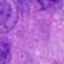

0


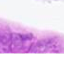

1


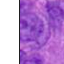

2


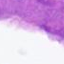

3


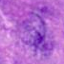

4


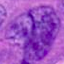

5


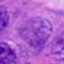

6


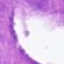

7


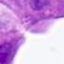

8


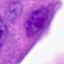

9


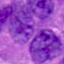

10


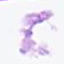

11


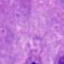

12


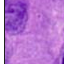

13


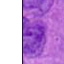

14


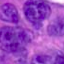

15


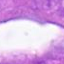

16


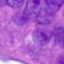

17


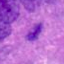

18


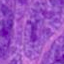

19


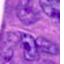

20


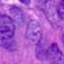

21


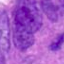

22


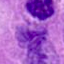

23


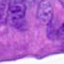

24


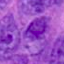

25


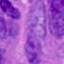

26


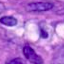

27


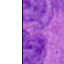

28


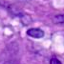

29


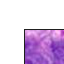

30


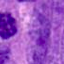

31


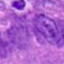

32


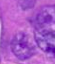

33


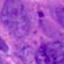

34


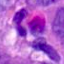

35


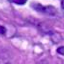

36


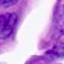

37


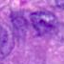

38


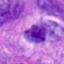

39


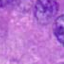

40


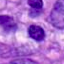

41


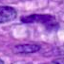

42


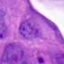

43


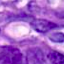

44


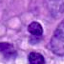

45


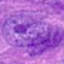

46


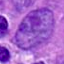

47


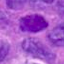

48


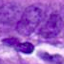

49


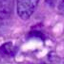

50


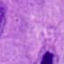

51


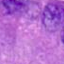

52


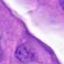

53


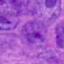

54


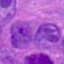

55


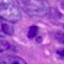

56


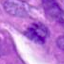

57


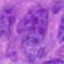

58


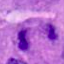

59


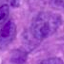

60


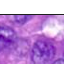

61


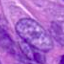

62


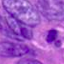

63


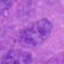

64


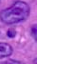

65


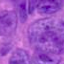

66


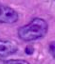

67


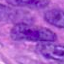

68


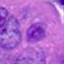

69


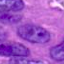

70


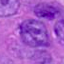

71


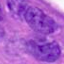

72


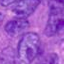

73


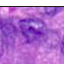

74


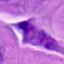

75


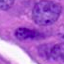

76


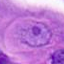

77


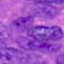

78


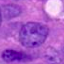

79


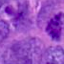

80


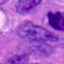

81


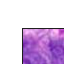

82


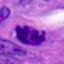

83


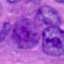

84


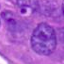

85


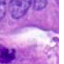

86


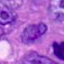

87


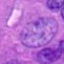

88


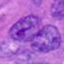

89


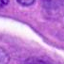

90


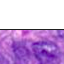

91


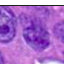

92


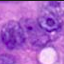

93


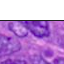

94


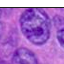

95


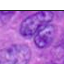

96


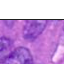

97


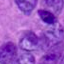

98


In [160]:
# from PIL import Image

# old_im = Image.open('Colonic Adenocarcinoma Mitoses-3.png')
# old_size_x = old_im.size[0]
# old_size_y = old_im.size[1]
# new_size = (old_size_x, old_size_y)
# new_im = Image.new("RGB", new_size)   ## luckily, this is already black!
# new_im.paste(old_im, ((new_size[0]-old_size[0])//2,
#                       (new_size[1]-old_size[1])//2))

#new_im.show()
#put in range()
#len(mydict)
# for i in range(len(mydict)):
#     img=Image.open("masklessmito.png")
#     x=int(mydict[i][2:5])
#     y=int(mydict[i][9:12])
#     a=x-32
#     b=y-32
#     c=x+32
#     d=y+32
#     area = (a, b, c, d)
#     cropped_img = img.crop(area)
#     ('nuc' + 'image_' + '_'+ str(i)+'.png', cropped_img)
#     #cropped_img.save("crop_" + str(i) + ".png")
#     cropped_img.show()
#     print(cropped_img.size)
   
    ############################
for i in range(len(mydict)):
    img=Image.open(input_img_file)
    alpha=(mydict[i][2:5])
    alphaRep=alpha.replace('y','')
    x=int(alphaRep)
    beta=(mydict[i][9:12])
    if (beta.count('')==1) and (len(beta)==0):
        betaGood=beta.replace('','0')
        print(betaGood)
        y=int(betaGood)
    else:
        y=int(beta)
    a=x-32
    b=y-32
    c=x+32
    d=y+32
    area = (a, b, c, d)
    cropped_img = img.crop(area)
    ('nuc' + 'image_' + '_'+ str(i)+'.png', cropped_img)
    cropped_img.save("crop_" + str(i) + ".png")
    cropped_img.show()
    print(i)
    #print(cropped_img.size)

##Draw squares on image with colored range heat map of probabilities

In [147]:
import requests
import cv2
from PIL import Image
from paramiko import SSHClient, AutoAddPolicy

client = SSHClient()
client.set_missing_host_key_policy(AutoAddPolicy())
client.connect('###.###.###.###', username='root', password='pass')
# stdin,stdout,stderr=client.exec_command('ls')
# output = stdout.readlines()
# for items in output:
#     print(items)
    


#########################




#url = 'http://172.17.0.1:5000/model/predict'
url = 'http://###.###.###.###:5000/model/predict'

# Submit the nuclei detection request by calling the rest API
def get_nuclei(input_img):
    """
    Takes in input image file path and detects poses.
    """
    files = {'image': ('image',open(input_img,'rb'), 'images/png')}
    result = requests.post(url, files=files).json()
    return result



# preds2 = get_nuclei('true.png')
# print(json.dumps(preds2, indent=2))

############################
#client.close()



In [159]:
probs=[]

#len(mydict)
for i in range(len(mydict)):
    png = Image.open('crop_' + str(i)+ '.png').convert('RGB')
    png.save('crop2rgb_' + str(i)+ '.png', 'PNG', quality=80)
    obj=get_nuclei('crop2rgb_' + str(i)+ '.png')
    pubj=str(obj['predictions'][0])
    qubj=(pubj[15:32])
    rubj=str(pubj[15:32])
    subj=rubj.replace('e','')
    tubj=subj.replace('-','')
    uubj=tubj.replace('}','')
    vubj=float(uubj)
    print(vubj)
    print(i)
    probs.append(vubj)
    
##Display these in color for different ranges like red for >1, yellow for <0.5, green for 0.5<x<1.0

1.08481599454535
0
0.00038643236621
1
2.61294699157588
2
4.87224824610166
3
5.34619493919308
4
4.3306852603564
5
3.98350721297902
6
5.79104016651399
7
8.48472045618109
8
4.36531990999355
9
8.55720099934842
10
0.00012058660649
11
0.0001154986312
12
3.46167871612124
13
7.19773606761009
14
1.40641641337424
15
4.13240486523136
16
1.22447627290966
17
0.00064372731139
18
2.78741372312651
19
5.87550266573089
20
3.77930859940534
21
1.39548637889674
22
1.99181504285661
23
1.29328027469455
24
1.24331163533497
25
2.99501516565214
26
1.22854441997333
27
1.3397967450146
28
7.66579159972025
29
2.84810048469807
30
6.90649030730128
31
3.87705767934676
32
2.31466929108137
33
1.98743218788877
34
5.69542862649541
35
3.81041377295332
36
2.02723877009702
37
4.37322751167812
38
9.19907324714586
39
2.55570539593463
40
5.47662511962698
41
1.09964514649618
42
4.32944807471358
43
2.33354944612074
44
1.80248134711291
45
3.1858512556937
46
3.29360773321241
47
4.54836845165118
48
1.08155891211936
49
5.877509465790

In [238]:
##Let people change threshold before displaying results
uthresh=0.0015
rectcords=[]
finalrects=[]
for j in range(len(probs)):
    if (probs[j]<1.0) and (probs[j]>uthresh):
        finalrects.append([mydict[j][2:5]])
        finalrects.append([mydict[j][9:12]])
        rectcords.append(j)
        print(probs[j])
 
   
lenfinrec=(len(finalrects)/2)+(len(finalrects)%2)
intlenfin=int(lenfinrec)
print(intlenfin)
print("Mito count: %i" %lenfinrec)
print(rectcords)
print(finalrects)

0.01868754252791
0.44939872622489
2
Mito count: 2
[59, 83]
[['308'], ['226'], ['690'], ['55']]


In [239]:
image1 = skimage.io.imread(input_img_file)   

#divide len by 2 append two non-values for -2
for coords in range(intlenfin):
    oddnos=[a for a in range(0,(len(finalrects))) if a%2 != 0][coords]
    y = int(finalrects[oddnos][0])
    evennos=[a for a in range(0,(2*len(finalrects))) if a%2 == 0][coords]
    x = int(finalrects[evennos][0])
    #print(coords)
    #print(evennos)
    #print(oddnos)
    #print(x)
    #print(y)
    #t=round(x/xorg2mask)
    #u=round(y/yorg2mask)
    res=cv2.circle(image1,(x,y), 63, (0,0,255), 1)
    

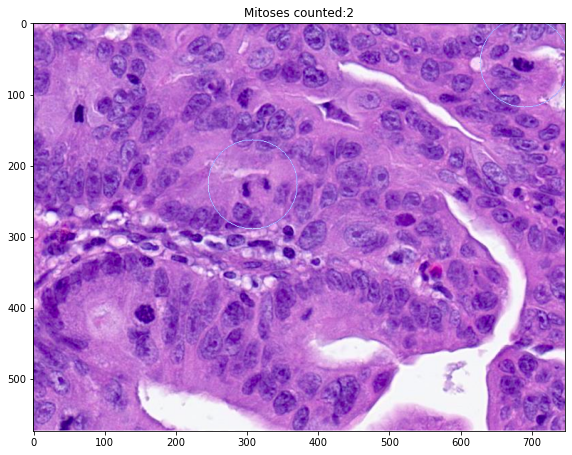

In [240]:
mitonum=(len(finalrects)/2)
figr = plt.figure()
figr.set_size_inches(10, 7.5)
plt.title("Mitoses counted:%i" %mitonum)
plt.imshow(res)
plt.show()

In [212]:
client = None
try:
    client = SSHClient()
    client.set_missing_host_key_policy(AutoAddPolicy())
    client.connect('###.###.####.####', username='root', password='pass')
    stdin, stdout, stderr = client.exec_command('ls -l')
finally:
    if client:
        client.close() 